In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# 명령의 출력이 주피터 노트북과 같은 프론트에서 실행되면, 결과를 셀 아래에 표시한다. 
%matplotlib inline   

In [3]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
'''
Null인 값 처리하기 - fillna()
inplace = True -> 원본 df 보존 없이 값 바로 채우기
isnull() -> 결측값이면 true, 아니면 false 리턴
'''
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('칼럼별 Null 값 개수')
print(titanic_df.isnull().sum())
print('\n데이터 세트 Null 값 개수 = ',titanic_df.isnull().sum().sum())

칼럼별 Null 값 개수
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

데이터 세트 Null 값 개수 =  0


In [13]:
'''
문자열 피처 처리하기 - (1) : 값 분포 확인하기
value_counts() - 어떤 컬럼이나 Series의 고유 값 개수를 리턴한다. 
'''
print('Sex 값 분포\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포\n',titanic_df['Embarked'].value_counts())

Sex 값 분포
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
D47              1
E50              1
C95              1
D15              1
B78              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [15]:
'''
선실 정보 Cabin 칼럼 정리
- N이 무려 687개
- 중요한 정보는 아무래도 선실 등급을 알려주는 맨 앞자리 -> 뒤에 것이 꼭 필요할까?
'''
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 선실 등급 알려주는 맨 앞자리만 가지도록 변경
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

## 성별에 따른 생존자 수 비교
> Women and Children first

1. 바다에서 사고가 날 경우 여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상이 될 것이다. 
2. 그 다음에는 아마 부자..? 유명인..?
3. 가난한 사람들은 아마 구조될 확률이 적을 것이다.. 그리고 가난한 사람들은 3등석에 탔을 확률이 높을 것이다,,

In [16]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

## 결론
> Survived 0은 사망, 1은 생존이다. 승객 중 여성은 314명, 남성은 577명이다. 여성 중 생존자는 233명으로, 약 74.2%가 생존했지만, 남성 중 생존자는 109명으로, 약 18.8% 가 생존했다. 이를 막대 차트로 그리면 다음과 같다.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

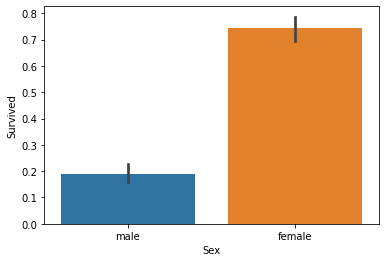

In [18]:
sb.barplot(x='Sex', y='Survived', data=titanic_df)

## 부자와 가난한 사람 간 생존 확률 차이

### 부자와 가난한 사람을 어떻게 구분할까?
> 선실 등급(Pclass)을 활용하자!


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

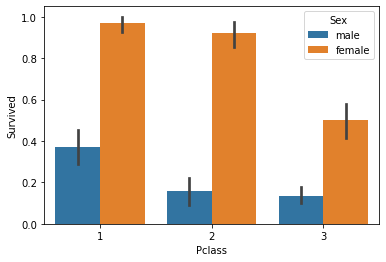

In [19]:
sb.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

## 정리

### 여성
> 여성의 경우 1, 2등실의 생존 확률에 차이가 크게 없으나, 3등실의 경우 생존 확률이 상대적으로 많이 떨어진다. 

### 남성
> 남성의 경우 1등석 생존 확률이 2, 3등실 생존 확률보다 월등히 높다.

## 나이에 따른 생존 확률 알아보기

- 0~5세 : Baby
- 6~12세 : Child
- 13~18세 : Teenager
- 19~25세 : Student
- 26~35세 : Young Adult
- 36~60세 : Adult
- 61세 이상 : Elderly
- -1 이하의 오류값 : Unkown

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

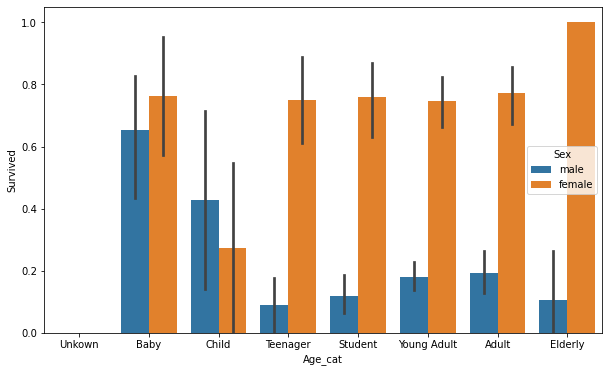

In [30]:
# 입력 나이에 따라 구분 값을 반환하는 함수 get_category
def get_category(age):
    cat=''
    if age <= -1 : cat='Unkown'
    elif age <= 5 : cat='Baby'
    elif age <= 12 : cat='Child'
    elif age <= 18 : cat='Teenager'
    elif age <= 25 : cat='Student'
    elif age <= 35 : cat='Young Adult'
    elif age <= 60 : cat='Adult'
    else: cat='Elderly'
        
    return cat

# 막대 그래프의 크기 figure를 더 크게 설정 - figsize(가로길이, 세로길이)
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unkown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# Age_cat이라는 새로운 칼럼 생성 - get_category() 이용
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda age : get_category(age))
sb.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

In [31]:
# axis=1 : 열을 따라 동작한다. 
titanic_df.drop('Age_cat', axis=1, inplace=True)

## 정리
예측과 다른 점
- 여자 child의 경우 다른 연령대에 비해 생존 확률이 낮다.

분석 결과
> Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임을 어느 정도 확인할 수 있다. 나머지 불필요한 피처들은 데이터 전처리 시 삭제가 필요함을 늒니다. 데이터 전처리 때 사용할 인코더 클래스는 LabelEncoder로 정했다. 

In [32]:
from sklearn.preprocessing import LabelEncoder

# 문자열 값 가지는 피처 인코딩하는 함수 
def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
        
    return df

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


# 위 내용을 함수로 만들어 다시 해보기

In [36]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거 함수
def drop_unnecessary_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    
    return df

# 위 3개의 함수 호출하는 데이터 전처리 함수
def transform_features(df):
    df = fillna(df)
    df = drop_unnecessary_features(df)
    df = format_features(df)
    
    return df

In [37]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv('./titanic_train.csv')
# Survived 속성만 클래스 결정값 데이터 세트로 만들기
y_titanic_df = titanic_df['Survived']
# Survived 속성을 드롭해 피처 데이터 세트를 만들기 
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 피처 데이터 세트에 데이터 전처리 수행
X_titanic_df = transform_features(X_titanic_df)

In [41]:
# 데이터 전처리 수행 이후 학습, 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

# 테스트 데이터 세트는 20%로 설정
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [43]:
# 머신러닝 알고리즘 이용해 학습, 예측 수행하고 정확도 평가하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정 트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# 결정 트리 - 학습/예측
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest - 학습/예측
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱 회귀 - 학습/예측
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659


In [47]:
# 교차 검증 - (1) 수행
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=5)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # 학습, 예측, 정확도 평가
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 = {1:.4f}'.format(iter_count, accuracy))
    
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 = {0:.4f}'.format(mean_score))

# 함수 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 = 0.7542
교차 검증 1 정확도 = 0.7809
교차 검증 2 정확도 = 0.7865
교차 검증 3 정확도 = 0.7697
교차 검증 4 정확도 = 0.8202
평균 정확도 = 0.7823


In [48]:
# 교차 검증 - (2) 수행 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 = {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도 = {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 = 0.7430
교차 검증 1 정확도 = 0.7753
교차 검증 2 정확도 = 0.7921
교차 검증 3 정확도 = 0.7865
교차 검증 4 정확도 = 0.8427
평균 정확도 = 0.7879


## KFold 교차 검증과 cross_val_score api 교차 검증 결과가 다른 이유
> cross_val_score API는 KFold가 아닌 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다. 

In [51]:
# 교차 검증 - (3) 수행
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_clf = GridSearchCV(dt_clf,param_grid=parameters, scoring='accuracy', cv=5)
grid_clf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_clf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_clf.best_score_))
best_clf = grid_clf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행
dpredictions = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 = {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 = 0.8715


## 정리
> 테스트 데이터 세트가 작으므로 하이퍼 파라미터 튜닝에 의한 예측 성능 향상이 8% 이상이나 증가한 것이지, 보통은 이 정도 수준으로 증가하기 매우 어렵다!